In [ ]:
pip install numpy pandas scikit-learn matplotlib seaborn tensorflow

Точность блендинга: 0.825
Время обучения блендинга: 0.0019 seconds
Время предсказания для блендинга: 0.0001 seconds


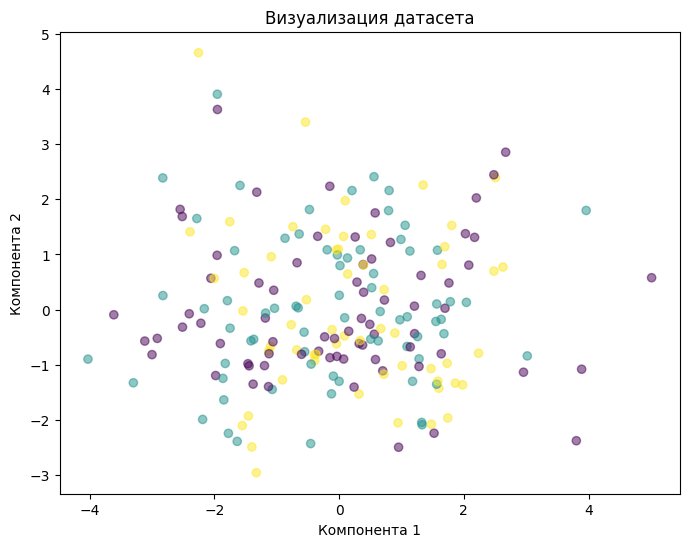

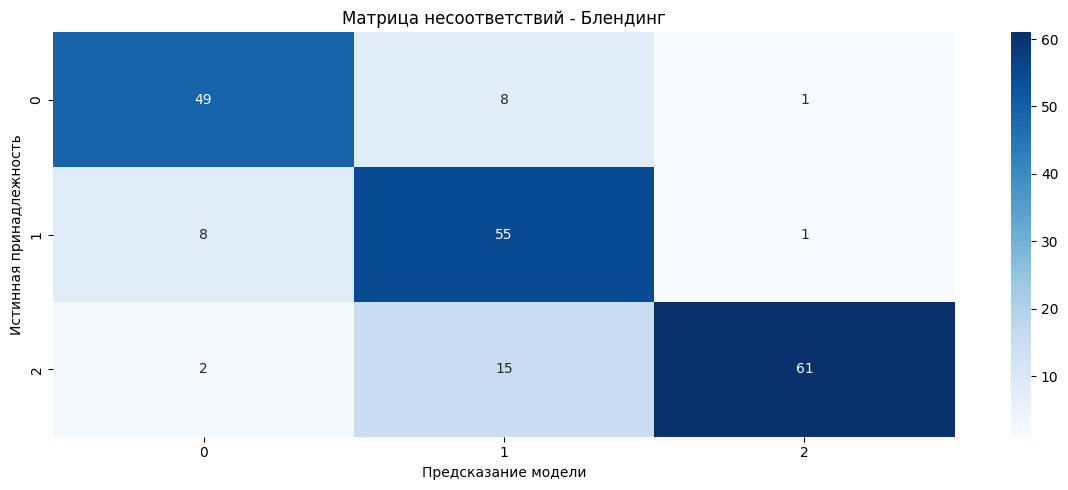

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.base import BaseEstimator, ClassifierMixin

class LogisticRegressionMetaModel(BaseEstimator, ClassifierMixin):
    def __init__(self):
        self.model = LogisticRegression()

    def fit(self, X, y):
        self.model.fit(X, y)
        return self

    def predict(self, X):
        return self.model.predict(X)

# Составление датасета для классификационной задачи
X, y = make_classification(n_samples=1000, n_features=20, n_classes=3, n_informative=10, random_state=80)

# Визуализируем датасет с помощью метода главных компонент
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_test)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=final_predictions_classes, cmap='viridis', alpha=0.5)
plt.title('Визуализация датасета')
plt.xlabel('Компонента 1')
plt.ylabel('Компонента 2')

# Делим датасет на тренировочную и проверочную части
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Базовые модели из библиотеки sklearn. Вторая модель - ансамблевая.
model1 = LogisticRegression(max_iter=200)
model2 = RandomForestClassifier() 
model3 = DecisionTreeClassifier()

model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)

# Generate predictions for the training set
metaPrediction1 = model1.predict(X_train)
metaPrediction2 = model2.predict(X_train)
metaPrediction3 = model3.predict(X_train)

# Stack the predictions to create a new feature set for the meta-model
X_meta_train = np.column_stack((metaPrediction1, metaPrediction2, metaPrediction3))

# Generate predictions for the test set
testPrediction1 = model1.predict(X_test)
testPrediction2 = model2.predict(X_test)
testPrediction3 = model3.predict(X_test)

# Stack the predictions for the test set
X_meta_test = np.column_stack((testPrediction1, testPrediction2, testPrediction3))

# Блендинг с Hard Voting.
blending_model = LogisticRegressionMetaModel()

start_time = time.time()
blending_model.fit(X_meta_train, y_train)
training_time_blending = time.time() - start_time

# Точность блендинга
start_time = time.time()
y_pred_blending = blending_model.predict(X_meta_test)
prediction_time_blending = time.time() - start_time
blending_accuracy = accuracy_score(y_test, y_pred_blending)

print(f'Точность блендинга: {blending_accuracy}')
print(f'Время обучения блендинга: {training_time_blending:.4f} seconds')
print(f'Время предсказания для блендинга: {prediction_time_blending:.4f} seconds')

# Составление матрицы несоответствий
conf_matrix_blending = confusion_matrix(y_test, y_pred_blending)

plt.figure(figsize=(12, 5))

plt.subplot(1, 1, 1)
sns.heatmap(conf_matrix_blending, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Матрица несоответствий - Блендинг')
plt.xlabel('Предсказание модели')
plt.ylabel('Истинная принадлежность')

plt.tight_layout()
plt.show()


/opt/homebrew/Cellar/jupyterlab/4.2.5_1/libexec/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/homebrew/Cellar/jupyterlab/4.2.5_1/libexec/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/homebrew/Cellar/jupyterlab/4.2.5_1/libexec/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/homebrew/Cellar/jupyterlab/4.

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  
Точность стекинга: 0.835
Время обучения стекинга: 1.5238 seconds
Время предсказания для стекинга: 0.0373 seconds


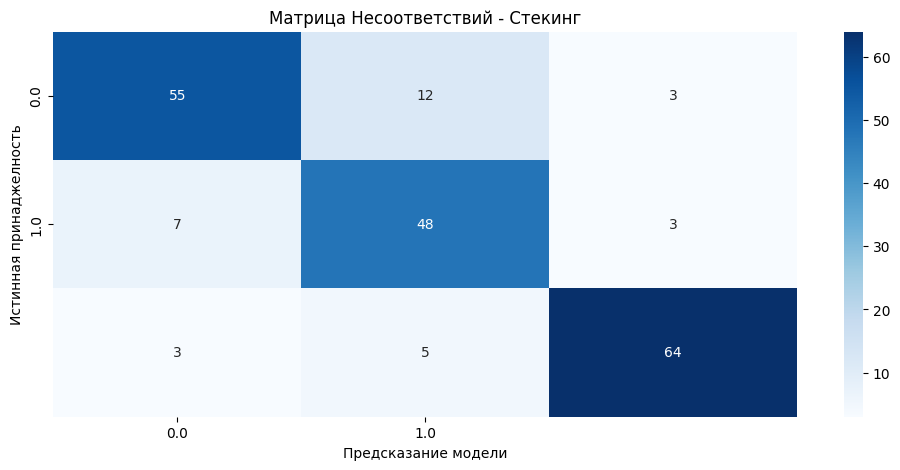

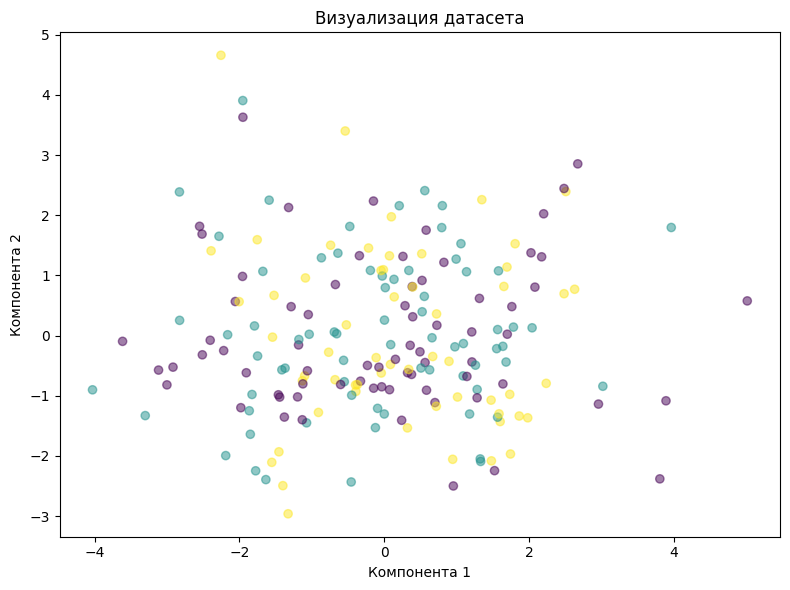

In [48]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import time
import matplotlib.pyplot as plt
import seaborn as sns

# Нейросеть - метамодель
class MetaModel:
    def __init__(self, input_dim, learning_rate=0.001):
        self.model = Sequential()
        self.model.add(Dense(10, activation='relu', input_dim=input_dim))
        self.model.add(Dense(3, activation='softmax'))
        self.model.compile(optimizer=Adam(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])

    def fit(self, X, y, epochs=100, batch_size=10):
        self.model.fit(X, y, epochs=epochs, batch_size=batch_size, verbose=0)

    def predict(self, X):
        return self.model.predict(X)  # Возвращает вероятности для каждого класса

# Составление датасета для классификационной задачи
X, y = make_classification(n_samples=1000, n_features=20, n_classes=3, n_informative=10, random_state=80)

# Преобразуем метки в одноразовое кодирование
y = to_categorical(y, num_classes=3)

# Делим датасет на тренировочную и проверочную части
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=80)

# Масштабируем признаки
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Базовые алгоритмы
base_models = [
    LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200),
    DecisionTreeClassifier(),
    RandomForestClassifier()
]

metamodel_train = np.zeros((X_train.shape[0], len(base_models), 3))

# Делаем фолды для кросс-валидации
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for i, model in enumerate(base_models):
    for train_index, val_index in kf.split(X_train):
        X_fold_train, X_fold_val = X_train[train_index], X_train[val_index]
        y_fold_train, y_fold_val = y_train[train_index], y_train[val_index]

        # Обучаем базовую модель на текущем фолде
        model.fit(X_fold_train, np.argmax(y_fold_train, axis=1))

        # Собираем предсказания
        metamodel_train[val_index, i] = model.predict_proba(X_fold_val)

# Стекинг с финальной моделью - нейросеть
start_time = time.time()

stacking_model = MetaModel(input_dim=len(base_models) * 3)
stacking_model.fit(metamodel_train.reshape(X_train.shape[0], -1), y_train, epochs=50)

training_time_stacking = time.time() - start_time

# Подготовка тестового набора для мета-модели
metamodel_test = np.zeros((X_test.shape[0], len(base_models), 3))

# Собираем предсказания от базовых моделей на тестовом наборе
for i, model in enumerate(base_models):
    metamodel_test[:, i] = model.predict_proba(X_test)

# Точность стекинга
start_time = time.time()

y_pred_stacking = stacking_model.predict(metamodel_test.reshape(X_test.shape[0], -1))
y_pred_stacking_class = np.argmax(y_pred_stacking, axis=1)
stacking_accuracy = accuracy_score(np.argmax(y_test, axis=1), y_pred_stacking_class)

prediction_time_stacking = time.time() - start_time

print(f'Точность стекинга: {stacking_accuracy}')
print(f'Время обучения стекинга: {training_time_stacking:.4f} seconds')
print(f'Время предсказания для стекинга: {prediction_time_stacking:.4f} seconds')

# Составление матрицы несоответствий
conf_matrix_stacking = confusion_matrix(np.argmax(y_test, axis=1), y_pred_stacking_class)

plt.figure(figsize=(12, 5))

plt.subplot(1, 1, 1)
sns.heatmap(conf_matrix_stacking, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Матрица Несоответствий - Стекинг')
plt.xlabel('Предсказание модели')
plt.ylabel('Истинная принаджелность')

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_test)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=final_predictions_classes, cmap='viridis', alpha=0.5)
plt.title('Визуализация датасета')
plt.xlabel('Компонента 1')
plt.ylabel('Компонента 2')

plt.tight_layout()
plt.show()